In [78]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

voc_root = "/Users/guolianglu/Desktop/backup/data/VOC"

transform = transforms.Compose([transforms.ToTensor()])
voc07_dataset = datasets.VOCDetection(voc_root, year='2007', image_set='trainval', download=False, transform=transform)
voc12_dataset = datasets.VOCDetection(voc_root, year='2012', image_set='trainval', download=False, transform=transform)
voc_classes = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

In [79]:
image_objects = [0] * 20
class_objects = [0] * 20
for _, target in voc07_dataset:
    for obj in target['annotation']['object']:
        class_objects[voc_classes.index(obj['name'])] += 1
    for cls in voc_classes:
        if cls in [obj['name'] for obj in target['annotation']['object']]:
            image_objects[voc_classes.index(cls)] += 1

for _, target in voc12_dataset:
    for obj in target['annotation']['object']:
        class_objects[voc_classes.index(obj['name'])] += 1
    for cls in voc_classes:
        if cls in [obj['name'] for obj in target['annotation']['object']]:
            image_objects[voc_classes.index(cls)] += 1

OSError: image file is truncated (37 bytes not processed)

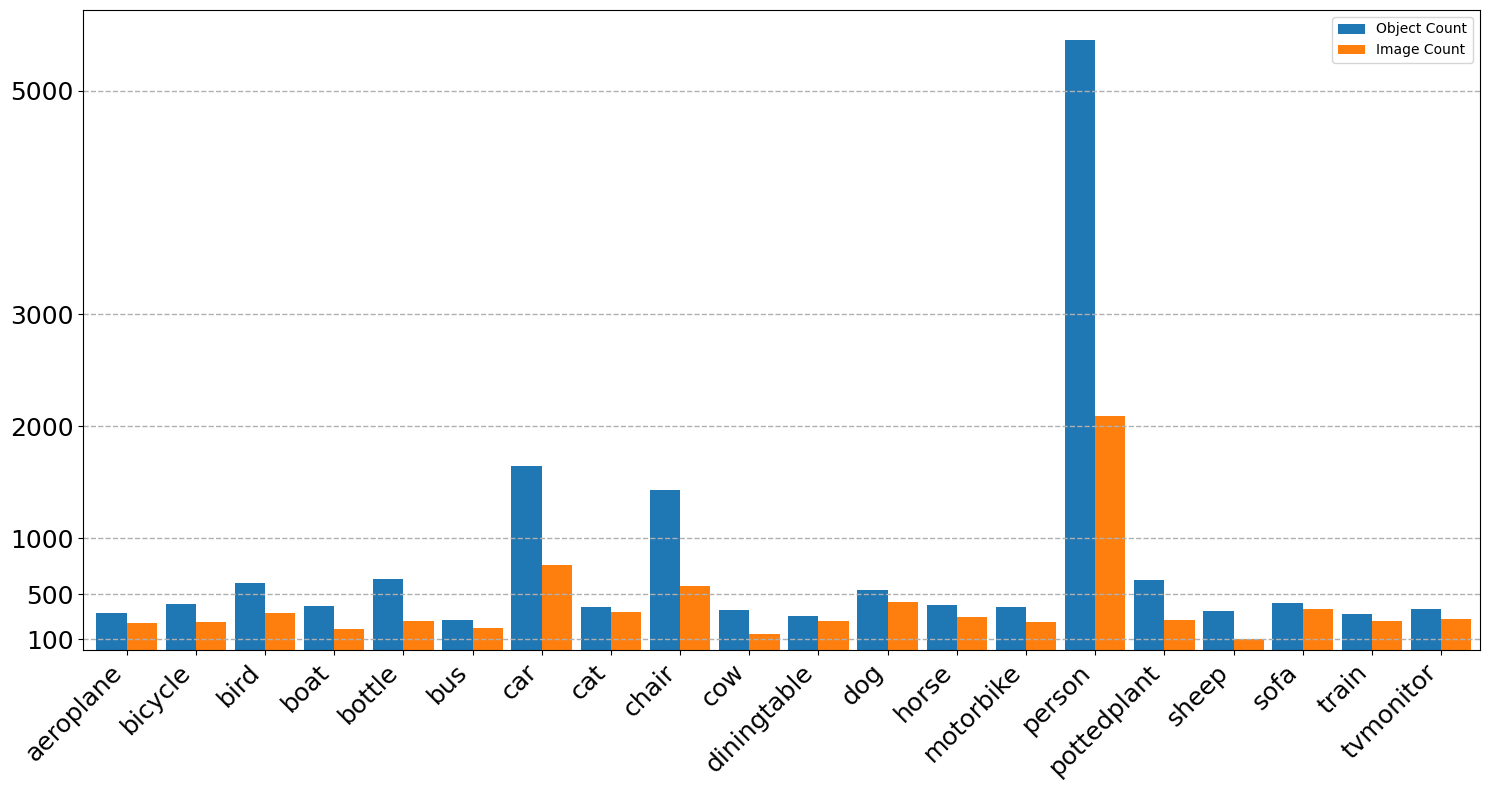

In [77]:
bar_width = 0.35
index = np.arange(len(voc_classes))

fig, ax = plt.subplots(figsize=(15, 8))
bar1 = ax.bar(index * 0.8 - bar_width / 2, class_objects, bar_width, label='Object Count')
bar2 = ax.bar(index * 0.8 + bar_width / 2, image_objects, bar_width, label='Image Count')

ax.set_xticks(index * 0.8)
ax.set_xticklabels(voc_classes, rotation=45, ha='right')
ax.legend()
ax.set_xlim(-0.5, len(voc_classes) - 4.35)
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=1)
ax.tick_params(axis='both', which='major', labelsize=18)
y_ticks = [100, 500, 1000, 2000, 3000, 5000]
ax.set_yticks(y_ticks)
ax.set_yticklabels([str(tick) for tick in y_ticks], fontsize=18)
plt.tight_layout()
plt.show()

In [ ]:
total_num = sum(class_objects)
class_objects = [i / total_num for i in class_objects]

plt.bar(voc_classes, class_objects)
plt.xticks(rotation=90)
plt.ylim(0, 0.5)
plt.show()

In [ ]:
class_objects = [0.05] * 20

plt.bar(voc_classes, class_objects)
plt.xticks(rotation=90)
plt.ylim(0, 0.5)
plt.show()

In [ ]:
import torch

matrix = torch.zeros(20, 20)
for _, target in voc_dataset:
    objects = target['annotation']['object']
    indices = list(set([voc_classes.index(obj['name']) for obj in objects]))
    if len(indices) == 1:
        continue
    for idx1 in indices:
        for idx2 in indices:
            if idx1 == idx2:
                continue
            matrix[idx1][idx2] += 1

# 画热力图
import seaborn as sns
import numpy as np

matrix = np.array(matrix)
sns.heatmap(matrix, cmap='YlGnBu', xticklabels=voc_classes, yticklabels=voc_classes)
plt.show()

